In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment/parquet/predictions_1.csv
/kaggle/input/assignment/parquet/Untitled.ipynb
/kaggle/input/assignment/parquet/predictions_1.parquet
/kaggle/input/assignment/parquet/CA684 Machine Learning Assignment Spring 2023.pdf
/kaggle/input/assignment/parquet/ml_1.ipynb
/kaggle/input/assignment/parquet/predictions_1.html
/kaggle/input/assignment/parquet/doc.docx
/kaggle/input/assignment/parquet/df_tr.csv
/kaggle/input/assignment/parquet/Getting-started Notebook for Students.ipynb
/kaggle/input/assignment/parquet/predictions_12345689.parquet
/kaggle/input/assignment/parquet/.ipynb_checkpoints/ml_1-checkpoint.ipynb
/kaggle/input/assignment/parquet/.ipynb_checkpoints/Untitled-checkpoint.ipynb
/kaggle/input/assignment/parquet/.ipynb_checkpoints/Getting-started Notebook for Students-checkpoint.ipynb
/kaggle/input/assignment/parquet/test/part-00170-of-00278.parquet
/kaggle/input/assignment/parquet/test/part-00049-of-00278.parquet
/kaggle/input/assignment/parquet/test/part-00065-of-

In [4]:
PATH = f"/kaggle/input/assignment/parquet/train/"

In [5]:
PATH2 = f"/kaggle/input/assignment/parquet/test/"

In [6]:
!ls -l {PATH}

total 306248
-rw-r--r-- 1 nobody nogroup 2819257 Apr 12 16:30 part-00000-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 2217167 Apr 12 16:30 part-00001-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 3193497 Apr 12 16:30 part-00002-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  160520 Apr 12 16:30 part-00003-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  264635 Apr 12 16:30 part-00004-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 3850764 Apr 12 16:30 part-00005-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  712852 Apr 12 16:30 part-00006-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 3348556 Apr 12 16:30 part-00007-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 2409262 Apr 12 16:30 part-00008-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 2419684 Apr 12 16:30 part-00009-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  147033 Apr 12 16:30 part-00010-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  130443 Apr 12 16:30 part-00011-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 3599704 Apr 12 16:30 part-00012-of-

In [7]:
!ls -l {PATH2}

total 38016
-rw-r--r-- 1 nobody nogroup  91327 Apr 12 16:30 part-00000-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 296106 Apr 12 16:30 part-00001-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  33729 Apr 12 16:30 part-00002-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 135432 Apr 12 16:30 part-00003-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 524492 Apr 12 16:30 part-00004-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 167414 Apr 12 16:30 part-00005-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  23003 Apr 12 16:30 part-00006-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  21327 Apr 12 16:30 part-00007-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 325090 Apr 12 16:30 part-00008-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 268895 Apr 12 16:30 part-00009-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  21055 Apr 12 16:30 part-00010-of-00278.parquet
-rw-r--r-- 1 nobody nogroup 580223 Apr 12 16:30 part-00011-of-00278.parquet
-rw-r--r-- 1 nobody nogroup  12913 Apr 12 16:30 part-00012-of-00278.parquet


In [8]:
parquet_filenames_train = !ls -l {PATH}

In [9]:
parquet_filenames_test = !ls -l {PATH2}

In [10]:
parquet_filenames_train[:3]

['total 306248',
 '-rw-r--r-- 1 nobody nogroup 2819257 Apr 12 16:30 part-00000-of-00278.parquet',
 '-rw-r--r-- 1 nobody nogroup 2217167 Apr 12 16:30 part-00001-of-00278.parquet']

In [11]:
parquet_filenames_test[:3]

['total 38016',
 '-rw-r--r-- 1 nobody nogroup  91327 Apr 12 16:30 part-00000-of-00278.parquet',
 '-rw-r--r-- 1 nobody nogroup 296106 Apr 12 16:30 part-00001-of-00278.parquet']

In [12]:
def get_parquet_data(folder, N):
    """ Read parquet data from mutiple files """

    filenames = [ 
        f"{PATH}/part-{i:05d}-of-{N:05d}.parquet" 
        for i in range(N)
    ]

    dataframes = [ 
        pd.read_parquet(filename) 
        for filename in filenames
    ]
    
    return pd.concat(dataframes)

In [13]:
def get_parquet_data2(folder2, M):
    """ Read parquet data from mutiple files """

    filenames2 = [ 
        f"{PATH2}/part-{j:05d}-of-{M:05d}.parquet" 
        for j in range(M)
    ]

    dataframes2 = [ 
        pd.read_parquet(filename2) 
        for filename2 in filenames2
    ]
    
    return pd.concat(dataframes2)

In [14]:
traindf = get_parquet_data("train", len(parquet_filenames_train)-1)

In [15]:
testdf = get_parquet_data2("test", len(parquet_filenames_test)-1)

In [16]:
import io
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn import metrics

In [17]:
!pip install pyarrow

In [19]:
import pyarrow.parquet as pq

In [20]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27119 entries, 0 to 174
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   27119 non-null  int64 
 1   title        27008 non-null  object
 2   description  27008 non-null  object
 3   tags         23232 non-null  object
 4   type         26975 non-null  object
 5   room         958 non-null    object
 6   craft_type   3606 non-null   object
 7   recipient    1478 non-null   object
 8   material     2341 non-null   object
 9   occasion     5766 non-null   object
 10  holiday      4546 non-null   object
 11  art_subject  278 non-null    object
 12  style        1878 non-null   object
 13  shape        302 non-null    object
 14  pattern      1170 non-null   object
dtypes: int64(1), object(14)
memory usage: 3.3+ MB


In [21]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245485 entries, 0 to 682
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            245485 non-null  int64 
 1   title                 244545 non-null  object
 2   description           244545 non-null  object
 3   tags                  210575 non-null  object
 4   type                  244211 non-null  object
 5   room                  8727 non-null    object
 6   craft_type            32520 non-null   object
 7   recipient             13753 non-null   object
 8   material              20876 non-null   object
 9   occasion              53229 non-null   object
 10  holiday               41019 non-null   object
 11  art_subject           2773 non-null    object
 12  style                 17032 non-null   object
 13  shape                 2358 non-null    object
 14  pattern               10678 non-null   object
 15  bottom_category_id  

In [22]:
testdf.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,None,floral arranging,None,None,None,None,None,None,None,None
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,None,floral arranging,None,None,None,None,None,None,None,None
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,None,floral arranging,None,None,None,None,None,None,None,None
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,None,floral arranging,None,None,None,None,None,None,None,None
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,None,None,None,None,None,None,None,None,None,None


In [23]:
traindf.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
0,543497833,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"predator helmet,motorcycle helmet,helmet,handm...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple
1,718680498,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helme,P...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black
2,718823736,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue
3,608840803,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown
4,804070543,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Custom helmet,Handmade helmet,Predator helmet,...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black


In [24]:
f"Number of rows in train: {len(traindf):,}"

'Number of rows in train: 245,485'

In [25]:
f"Number of rows in test: {len(testdf):,}"

'Number of rows in test: 27,119'

In [26]:
f"Number of unique products in train: {len(traindf['product_id'].unique()):,}"

'Number of unique products in train: 245,485'

In [27]:
f"Number of unique products in test: {len(testdf['product_id'].unique()):,}"

'Number of unique products in test: 27,119'

In [28]:
f"Number of columns in train: {len(traindf.columns):,}"

'Number of columns in train: 21'

In [29]:
f"Number of columns in train: {len(testdf.columns):,}"

'Number of columns in train: 15'

In [30]:
list(traindf.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern',
 'bottom_category_id',
 'bottom_category_text',
 'top_category_id',
 'top_category_text',
 'color_id',
 'color_text']

In [31]:
list(testdf.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern']

In [32]:
traindf['type'].unique()

array(['physical', None, 'download'], dtype=object)

In [33]:
testdf['type'].unique()

array(['physical', 'download', None], dtype=object)

In [34]:
traindf['type'].value_counts(dropna=False)

physical    236137
download      8074
NaN           1274
Name: type, dtype: int64

In [35]:
testdf['type'].value_counts(dropna=False)

physical    26076
download      899
NaN           144
Name: type, dtype: int64

In [36]:
COLORS = traindf['color_id'].unique()
NUM_COLORS = len(COLORS)
f"Number of colors in train: {NUM_COLORS:,}"

'Number of colors in train: 20'

In [37]:
f"Number of top categories in train: {len(traindf['top_category_text'].unique()):,}"

'Number of top categories in train: 15'

In [38]:
pd.value_counts(traindf['top_category_text'], sort=True, ascending=False)

home_and_living                53200
craft_supplies_and_tools       42348
clothing                       32028
toys_and_games                 14427
accessories                    12610
bath_and_beauty                12426
paper_and_party_supplies       10811
shoes                          10355
weddings                       10333
jewelry                         9457
art_and_collectibles            8741
electronics_and_accessories     8177
books_movies_and_music          7378
bags_and_purses                 6645
pet_supplies                    6549
Name: top_category_text, dtype: int64

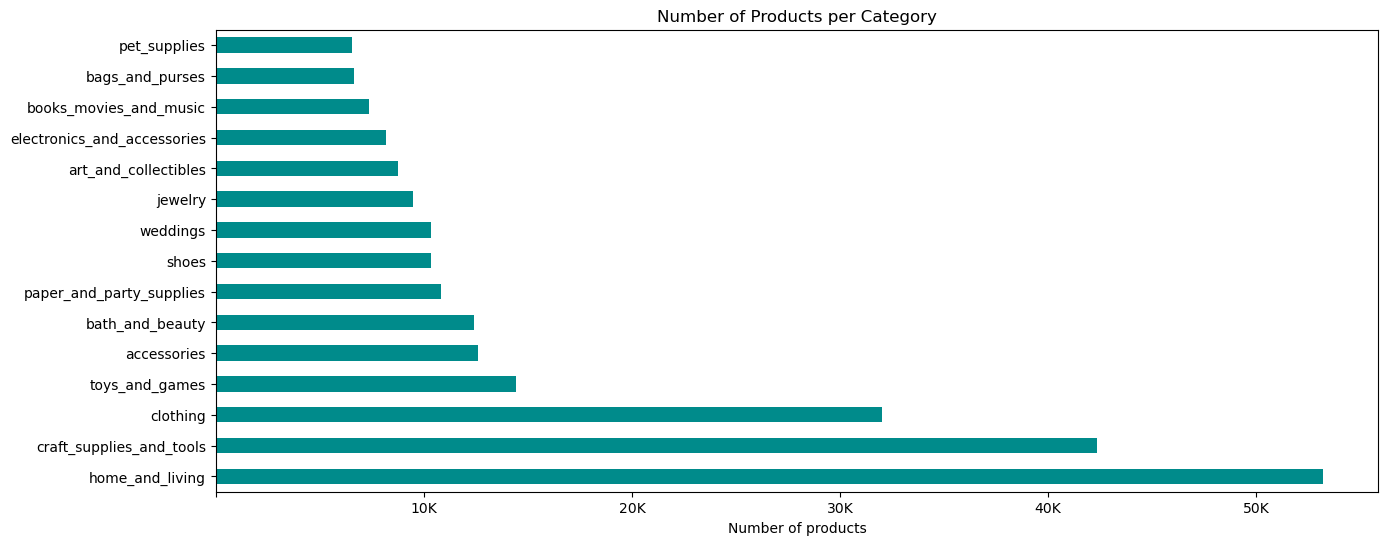

In [39]:
figsize = (15, 6)
column = 'top_category_text'
x_limit = 60000
x_step = 10000
color = 'darkcyan'
    
figure, ax = plt.subplots(figsize=figsize)
pd.value_counts(
    traindf[column], 
    sort=True, ascending=False).plot.barh(color=color)
plt.title(f"Number of Products per Category")
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()

In [40]:
## there are no top_category_id, bottom_category_id, color_id, top_category_text, bottom_category_text, color_text in testdf

In [41]:
## Text pre-processing

In [42]:
traindf.isnull().mean()*100

product_id               0.000000
title                    0.382915
description              0.382915
tags                    14.220828
type                     0.518973
room                    96.444997
craft_type              86.752755
recipient               94.397621
material                91.496018
occasion                78.316801
holiday                 83.290629
art_subject             98.870399
style                   93.061898
shape                   99.039453
pattern                 95.650243
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

In [43]:
testdf.isnull().mean()*100

product_id      0.000000
title           0.409307
description     0.409307
tags           14.333124
type            0.530993
room           96.467421
craft_type     86.703050
recipient      94.549947
material       91.367676
occasion       78.738154
holiday        83.236845
art_subject    98.974888
style          93.074966
shape          98.886390
pattern        95.685682
dtype: float64

In [34]:
## pd.set_option('display.max_colwidth', None)

In [44]:
traindf['holiday'].value_counts(dropna=False)

NaN                 204466
christmas            20546
valentine's day       3935
halloween             3460
easter                3390
mother's day          2685
father's day          1566
thanksgiving          1503
independence day      1297
new year's            1175
st patrick's day       454
hanukkah               215
cinco de mayo          201
diwali                 165
lunar new year         141
veterans day            88
passover                81
april fools'            43
kwanzaa                 43
eid                     16
holi                    15
Name: holiday, dtype: int64

In [45]:
import pandas as pd

holidays = ["christmas", "valentine's day", "halloween", "easter", "mother's day", "father's day", "thanksgiving", "independence day", "new year's", "st patrick's day", "hanukkah", "cinco de mayo", "diwali", "lunar new year", "veterans day", "passover", "april fools'", "kwanzaa", "eid", "holi"]

for holiday in holidays:
    traindf.loc[traindf['description'].str.contains(holiday, case=False) | traindf['title'].str.contains(holiday, case=False), 'holiday'] = holiday

traindf['holiday'] = traindf['holiday'].fillna("Unknown")

In [46]:
traindf.tail(10)

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
673,1385766632,Red Silk Banarasi Vintage Clutch,Our Vintage Clutch is a timeless addition to a...,"trendsetter,fashionable,trendy,fashion,artista...",physical,None,None,None,None,None,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,14,red
674,1353553203,AIIigator Mens Brown Leather Clutch Large Capa...,AIIigator Mens Brown Leather Clutch Large Capa...,"big clutch bag,mens leather clutch,leather bum...",physical,None,None,None,None,anniversary,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,4,brown
675,1242766046,"Vintage small black Corde&#39; evening clutch,...",Timeless small evening bag when you just need ...,"black Corde' bag,woven fiber purse,retro Corde...",physical,None,None,None,None,None,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,1,black
676,1176086289,Handcrafted Antique Wood Clutch | Authentic Fl...,Gorgeous handmade black luxury wooden purse be...,"floral clutch,party bags,formal handbags,Woode...",physical,None,None,None,None,bachelorette party,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,4,brown
677,1202041887,India Mogul Horsemen Silk Oriental Vintage Clu...,India Mogul Horsemen Silk Oriental Vintage Clu...,"warriors,Mogul fashion,India men horses,metall...",physical,None,None,None,None,birthday,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,0,beige
678,1330991677,Vintage - 1980&#39;s - APRI NIGHTS - Black Alu...,This is a charming Vintage - 1980&#39;s - APRI...,"Black Mesh Beading,Apri Nights,Evening Bag,Cro...",physical,None,None,None,None,prom,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,1,black
679,927998323,Gold Eloquent Envelope Clutch bag,Looking for a classy posh bag to hit up a hot ...,"clutch,gold,soft,envelope,disco",physical,None,None,None,None,wedding,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,7,gold
680,1393052238,"Personalized pouch, toiletry bag, makeup bag",Personalized items are not returned or exchang...,None,physical,None,None,None,None,bachelorette party,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,17,white
681,775199837,"Floral handbag, Canvas bag, Bridesmaid bag, gu...",Handbag of flowers and jute ideal for day part...,"Flower handbag,Canvas bag,Bridesmaid bag,guest...",physical,None,None,None,None,bridal shower,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,0,beige
682,1136519781,Modern Marrakesh Bohemian Seed Beaded Clutch B...,Modern Marrakesh Bohemian Seed Beaded Clutch B...,"Beaded Clutch,Seed Bead Bags,Beaded Bags,Bead ...",physical,None,None,None,None,None,...,None,None,None,None,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,13,rainbow


In [47]:
import pandas as pd

holidays = ["christmas", "valentine's day", "halloween", "easter", "mother's day", "father's day", "thanksgiving", "independence day", "new year's", "st patrick's day", "hanukkah", "cinco de mayo", "diwali", "lunar new year", "veterans day", "passover", "april fools'", "kwanzaa", "eid", "holi"]

for holiday in holidays:
    testdf.loc[testdf['description'].str.contains(holiday, case=False) | testdf['title'].str.contains(holiday, case=False), 'holiday'] = holiday

testdf['holiday'] = testdf['holiday'].fillna("Unknown")

In [48]:
testdf.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,None,floral arranging,None,None,None,Unknown,None,None,None,None
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,None,floral arranging,None,None,None,holi,None,None,None,None
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,None,floral arranging,None,None,None,christmas,None,None,None,None
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,None,floral arranging,None,None,None,holi,None,None,None,None
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,None,None,None,None,None,Unknown,None,None,None,None


In [49]:
# dropping the columns with more than 80% null values

In [50]:
traindf=traindf.drop(['room', 'craft_type', 'recipient', 'material', 'occasion', 'art_subject', 'style', 'shape', 'pattern'], axis=1)

In [51]:
traindf.tail()

,product_id,title,description,tags,type,holiday,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
678,1330991677,Vintage - 1980&#39;s - APRI NIGHTS - Black Alu...,This is a charming Vintage - 1980&#39;s - APRI...,"Black Mesh Beading,Apri Nights,Evening Bag,Cro...",physical,Unknown,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,1,black
679,927998323,Gold Eloquent Envelope Clutch bag,Looking for a classy posh bag to hit up a hot ...,"clutch,gold,soft,envelope,disco",physical,Unknown,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,7,gold
680,1393052238,"Personalized pouch, toiletry bag, makeup bag",Personalized items are not returned or exchang...,None,physical,mother's day,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,17,white
681,775199837,"Floral handbag, Canvas bag, Bridesmaid bag, gu...",Handbag of flowers and jute ideal for day part...,"Flower handbag,Canvas bag,Bridesmaid bag,guest...",physical,valentine's day,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,0,beige
682,1136519781,Modern Marrakesh Bohemian Seed Beaded Clutch B...,Modern Marrakesh Bohemian Seed Beaded Clutch B...,"Beaded Clutch,Seed Bead Bags,Beaded Bags,Bead ...",physical,Unknown,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,13,rainbow


In [52]:
#pd.reset_option('max_colwidth')


In [53]:
testdf=testdf.drop(['room', 'craft_type', 'recipient', 'material', 'occasion', 'art_subject', 'style', 'shape', 'pattern'], axis=1)

In [54]:
testdf.head()

,product_id,title,description,tags,type,holiday
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,Unknown
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,holi
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,christmas
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,holi
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,Unknown


In [55]:
traindf.isnull().mean()*100

product_id               0.000000
title                    0.382915
description              0.382915
tags                    14.220828
type                     0.518973
holiday                  0.000000
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

In [56]:
testdf.isnull().mean()*100

product_id      0.000000
title           0.409307
description     0.409307
tags           14.333124
type            0.530993
holiday         0.000000
dtype: float64

In [57]:
# handle null values

In [58]:
traindf['title'].fillna('unknown', inplace=True)
traindf['description'].fillna('unknown', inplace=True)
#traindf['tags'].fillna('unknown', inplace=True)

In [59]:
traindf.isna().mean()*100

product_id               0.000000
title                    0.000000
description              0.000000
tags                    14.220828
type                     0.518973
holiday                  0.000000
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

In [60]:
testdf['title'].fillna('unknown', inplace=True)
testdf['description'].fillna('unknown', inplace=True)
#testdf['tags'].fillna('unknown', inplace=True)

In [61]:
testdf.isnull().mean()*100

product_id      0.000000
title           0.000000
description     0.000000
tags           14.333124
type            0.530993
holiday         0.000000
dtype: float64

In [62]:

import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')

def impute_tags(r):
    if pd.isna(r['tags']):
        if r['description']:
            d = nlp(r['description'])
        elif r['title']:
            d = nlp(r['title'])
        else:
            return ''
        keywords = [token.lemma_ for token in d if not token.is_stop and token.is_alpha and len(token) > 2]
        tags = ','.join(keywords)
        if tags:
            return tags
    return str(r['tags'])

def generate_tags(r):
    if pd.isna(r['tags']):
        if r['title']:
            d = nlp(r['title'])
            keywords = [token.lemma_ for token in d if not token.is_stop and token.is_alpha]
            tags = ','.join(keywords)
            if tags:
                return tags
    return str(r['tags'])

traindf['tags'] = traindf.apply(impute_tags, axis=1)
traindf['tags'] = traindf.apply(generate_tags, axis=1)


In [63]:
traindf.isna().mean()*100

product_id              0.000000
title                   0.000000
description             0.000000
tags                    0.000000
type                    0.518973
holiday                 0.000000
bottom_category_id      0.000000
bottom_category_text    0.000000
top_category_id         0.000000
top_category_text       0.000000
color_id                0.000000
color_text              0.000000
dtype: float64

In [64]:
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')

def impute_tags(r):
    if pd.isna(r['tags']):
        if r['description']:
            d = nlp(r['description'])
        elif r['title']:
            d = nlp(r['title'])
        else:
            return ''
        keywords = [token.lemma_ for token in d if not token.is_stop and token.is_alpha and len(token) > 2]
        tags = ','.join(keywords)
        if tags:
            return tags
    return str(r['tags'])

def generate_tags(r):
    if pd.isna(r['tags']):
        if r['title']:
            d = nlp(r['title'])
            keywords = [token.lemma_ for token in d if not token.is_stop and token.is_alpha]
            tags = ','.join(keywords)
            if tags:
                return tags
    return str(r['tags'])

testdf['tags'] = testdf.apply(impute_tags, axis=1)
testdf['tags'] = testdf.apply(generate_tags, axis=1)


In [65]:
testdf.isna().mean()*100

product_id     0.000000
title          0.000000
description    0.000000
tags           0.000000
type           0.530993
holiday        0.000000
dtype: float64

In [66]:
traindf.columns

Index(['product_id', 'title', 'description', 'tags', 'type', 'holiday',
       'bottom_category_id', 'bottom_category_text', 'top_category_id',
       'top_category_text', 'color_id', 'color_text'],
      dtype='object')

In [67]:
testdf.columns

Index(['product_id', 'title', 'description', 'tags', 'type', 'holiday'], dtype='object')

In [68]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [69]:
def print_plot(index):
    example = traindf[traindf.index == index][['title', 'tags']].values[0]
    if len(example) > 0:
        print('Title:',example[0])
        print('Tag:', example[1])
print_plot(10)

Title: Full-face custom motorcycle helmet ,Motorcycle skull helmet ,Custom motorcycle helmet ,Handmade motorcycle helmet ,Skull helmet 
Tag: predator helmet,airbrushed helmet,painted helmet,handmade helmet,motorcycle helmet,custom helmet,helmet,HelmetArtThai


In [70]:
from wordcloud import WordCloud, STOPWORDS

In [71]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    if text is None:
        return ''

    #if text is not None:
    text = BeautifulSoup(text, "lxml").text 
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
    
traindf['title'] = traindf['title'].apply(clean_text)
print_plot(10)

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


Title: fullface custom motorcycle helmet motorcycle skull helmet custom motorcycle helmet handmade motorcycle helmet skull helmet
Tag: predator helmet,airbrushed helmet,painted helmet,handmade helmet,motorcycle helmet,custom helmet,helmet,HelmetArtThai


In [73]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    if text is None:
        return ''

    #if text is not None:
    text = BeautifulSoup(text, "lxml").text 
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
    
testdf['title'] = testdf['title'].apply(clean_text)
print_plot(10)

Title: fullface custom motorcycle helmet motorcycle skull helmet custom motorcycle helmet handmade motorcycle helmet skull helmet
Tag: predator helmet,airbrushed helmet,painted helmet,handmade helmet,motorcycle helmet,custom helmet,helmet,HelmetArtThai


In [74]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    if text is None:
        return ''

    #if text is not None:
    text = BeautifulSoup(text, "lxml").text 
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
traindf['tags'] = traindf['tags'].apply(clean_text)
print_plot(10)

Title: fullface custom motorcycle helmet motorcycle skull helmet custom motorcycle helmet handmade motorcycle helmet skull helmet
Tag: predator helmet airbrushed helmet painted helmet handmade helmet motorcycle helmet custom helmet helmet helmetartthai


In [75]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    if text is None:
        return ''

    #if text is not None:
    text = BeautifulSoup(text, "lxml").text 
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
    
testdf['tags'] = testdf['tags'].apply(clean_text)
print_plot(10)

Title: fullface custom motorcycle helmet motorcycle skull helmet custom motorcycle helmet handmade motorcycle helmet skull helmet
Tag: predator helmet airbrushed helmet painted helmet handmade helmet motorcycle helmet custom helmet helmet helmetartthai


In [76]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    if text is None:
        return ''

    #if text is not None:
    text = BeautifulSoup(text, "lxml").text 
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
    
traindf['description'] = traindf['description'].apply(clean_text)
print_plot(10)

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:408: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


Title: fullface custom motorcycle helmet motorcycle skull helmet custom motorcycle helmet handmade motorcycle helmet skull helmet
Tag: predator helmet airbrushed helmet painted helmet handmade helmet motorcycle helmet custom helmet helmet helmetartthai


In [77]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    if text is None:
        return ''

    #if text is not None:
    text = BeautifulSoup(text, "lxml").text 
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
testdf['description'] = testdf['description'].apply(clean_text)


In [78]:
## impute column "type"

In [79]:
traindf.isnull().mean()*100

product_id              0.000000
title                   0.000000
description             0.000000
tags                    0.000000
type                    0.518973
holiday                 0.000000
bottom_category_id      0.000000
bottom_category_text    0.000000
top_category_id         0.000000
top_category_text       0.000000
color_id                0.000000
color_text              0.000000
dtype: float64

In [80]:
import pandas as pd

def impute_type(row):
    if pd.isna(row['type']): 
        if 'no physical' in row['description'] or 'download' in row['description']:
            return 'download'
        elif 'no physical' in row['title'] or 'download' in row['title']:
            return 'download'
        else:
            return 'physical'
    else:
        return row['type'] 

traindf['type'] = traindf.apply(impute_type, axis=1)


In [81]:
traindf.isnull().mean()*100

product_id              0.0
title                   0.0
description             0.0
tags                    0.0
type                    0.0
holiday                 0.0
bottom_category_id      0.0
bottom_category_text    0.0
top_category_id         0.0
top_category_text       0.0
color_id                0.0
color_text              0.0
dtype: float64

In [83]:
traindf['type'].value_counts(dropna=False)

physical    237411
download      8074
Name: type, dtype: int64

In [84]:
traindf.tail()

,product_id,title,description,tags,type,holiday,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
678,1330991677,vintage 1980s apri nights black alumesh evenin...,charming vintage 1980s apri nights black alume...,black mesh beading apri nights evening bag cro...,physical,Unknown,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,1,black
679,927998323,gold eloquent envelope clutch bag,looking classy posh bag hit hot club gold enve...,clutch gold soft envelope disco,physical,Unknown,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,7,gold
680,1393052238,personalized pouch toiletry bag makeup bag,personalized items returned exchanged accordan...,personalized item return exchange accordance g...,physical,mother's day,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,17,white
681,775199837,floral handbag canvas bag bridesmaid bag guest...,handbag flowers jute ideal day partiesnndetail...,flower handbag canvas bag bridesmaid bag guest...,physical,valentine's day,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,0,beige
682,1136519781,modern marrakesh bohemian seed beaded clutch b...,modern marrakesh bohemian seed beaded clutch b...,beaded clutch seed bead bags beaded bags bead ...,physical,Unknown,157,bags_and_purses.handbags.clutches_and_evening_...,2,bags_and_purses,13,rainbow


In [85]:
def impute_type(row):
    if pd.isna(row['type']): 
        if 'no physical' in row['description'] or 'download' in row['description']:
            return 'download'
        elif 'no physical' in row['title'] or 'download' in row['title']:
            return 'download'
        else:
            return 'physical'
    else:
        return row['type'] 

testdf['type'] = testdf.apply(impute_type, axis=1)


In [86]:
testdf.isnull().mean()*100

product_id     0.0
title          0.0
description    0.0
tags           0.0
type           0.0
holiday        0.0
dtype: float64

In [87]:
testdf['type'].value_counts(dropna=False)

physical    26220
download      899
Name: type, dtype: int64

In [88]:
testdf.tail()

,product_id,title,description,tags,type,holiday
170,809100810,book 1000 things george stimpson,vintage book thousand things george stimpson 1...,vintage book thousand thing george stimpson ed...,physical,Unknown
171,1358895140,vintage story sugar hawaii softcover book hawa...,story sugar hawaiinnpublished hawaiian sugar p...,vintage hawaii sugar history hawaiian 1926 fir...,physical,Unknown
172,1366768240,francis king man rock vintage penguin books fi...,man rock 1957 seventh novel francis king haile...,penguin books 1960s penguin book lover gift 19...,physical,Unknown
173,1168372040,children abbey 1840s regina roche three volume...,charming early victorian antique edition child...,children abbey regina maria roche regina roche...,physical,Unknown
174,1157860460,1903 eliots silas marner george eliot macmilla...,stored pet smoke free environmentnshipping opt...,silas marner antique silas marner george eliot...,physical,Unknown


In [80]:
###############

In [ ]:
#pd.set_option('display.max_colwidth', None)

In [ ]:
#pd.set_option('display.max_colwidth', None)
#pd.reset_option('max_colwidth')


In [89]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245485 entries, 0 to 682
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            245485 non-null  int64 
 1   title                 245485 non-null  object
 2   description           245485 non-null  object
 3   tags                  245485 non-null  object
 4   type                  245485 non-null  object
 5   holiday               245485 non-null  object
 6   bottom_category_id    245485 non-null  int64 
 7   bottom_category_text  245485 non-null  object
 8   top_category_id       245485 non-null  int64 
 9   top_category_text     245485 non-null  object
 10  color_id              245485 non-null  int64 
 11  color_text            245485 non-null  object
dtypes: int64(4), object(8)
memory usage: 24.3+ MB


In [90]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27119 entries, 0 to 174
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   27119 non-null  int64 
 1   title        27119 non-null  object
 2   description  27119 non-null  object
 3   tags         27119 non-null  object
 4   type         27119 non-null  object
 5   holiday      27119 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [91]:
## taking clean data into new dataframes traindf2 and testdf2

In [92]:
traindf2=traindf.copy(deep=True)
traindf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245485 entries, 0 to 682
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            245485 non-null  int64 
 1   title                 245485 non-null  object
 2   description           245485 non-null  object
 3   tags                  245485 non-null  object
 4   type                  245485 non-null  object
 5   holiday               245485 non-null  object
 6   bottom_category_id    245485 non-null  int64 
 7   bottom_category_text  245485 non-null  object
 8   top_category_id       245485 non-null  int64 
 9   top_category_text     245485 non-null  object
 10  color_id              245485 non-null  int64 
 11  color_text            245485 non-null  object
dtypes: int64(4), object(8)
memory usage: 24.3+ MB


In [93]:
testdf2=testdf.copy(deep=True)
testdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27119 entries, 0 to 174
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   27119 non-null  int64 
 1   title        27119 non-null  object
 2   description  27119 non-null  object
 3   tags         27119 non-null  object
 4   type         27119 non-null  object
 5   holiday      27119 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [94]:
## extrcting colors from description column and creating new column extracted_colors

In [95]:
import re

color_pattern = r'\b(?:beige|black|blue|bronze|brown|clear|copper|gold|green|grey|orange|other|pink|purple|rainbow|red|rose gold|silver|white|yellow)\b'

def extract_colors(string):
    return re.findall(color_pattern, string.lower())

traindf2['extracted_colors'] = traindf2['description'].apply(extract_colors)

traindf2.loc[:, ["description", "extracted_colors"]]

,description,extracted_colors
0,helmetartthai thailand since 2016 nn n name ph...,[]
1,helmetartthai thailand since 2016 nn n name ph...,"[black, red, white, black, blue, gold, red]"
2,helmetartthai thailand since 2016 nn n name ph...,[]
3,helmetartthai thailand since 2016 nn n name ph...,[]
4,helmetartthai thailand since 2016 nn n name ph...,"[black, red, white, black, blue, gold, red]"
...,...,...
678,charming vintage 1980s apri nights black alume...,"[black, black, black, black]"
679,looking classy posh bag hit hot club gold enve...,[gold]
680,personalized items returned exchanged accordan...,[]
681,handbag flowers jute ideal day partiesnndetail...,"[gold, brown]"


In [96]:
# converting list into string

def join_colors(colors):
    return ', '.join(colors)

traindf2['extracted_colors'] = traindf2['extracted_colors'].apply(join_colors)

traindf2.head()

,product_id,title,description,tags,type,holiday,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,extracted_colors
0,543497833,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet motorcycle helmet helmet handm...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple,
1,718680498,fullface predator motorcycle helmet custom pre...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helme p...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,"black, red, white, black, blue, gold, red"
2,718823736,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue,
3,608840803,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown,
4,804070543,fullface predator motorcycle helmet custom pre...,helmetartthai thailand since 2016 nn n name ph...,custom helmet handmade helmet predator helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,"black, red, white, black, blue, gold, red"


In [97]:
## repeating same with testdf2

In [98]:
import re

color_pattern = r'\b(?:beige|black|blue|bronze|brown|clear|copper|gold|green|grey|orange|other|pink|purple|rainbow|red|rose gold|silver|white|yellow)\b'

def extract_colors(string):
    return re.findall(color_pattern, string.lower())

testdf2['extracted_colors'] = testdf2['description'].apply(extract_colors)

testdf2.loc[:, ["description", "extracted_colors"]]

,description,extracted_colors
0,12 small pressed reddishorange japanese maple ...,[]
1,glitter fake leavesnprice 5 leaves nleaf size ...,[]
2,listing includes 50 fresh holly leaves freshly...,[green]
3,glitter pine stemsnprice 1 branchnthe total he...,[]
4,free shipping,[]
...,...,...
170,vintage book thousand things george stimpson 1...,[]
171,story sugar hawaiinnpublished hawaiian sugar p...,[]
172,man rock 1957 seventh novel francis king haile...,[]
173,charming early victorian antique edition child...,"[white, black, white]"


In [99]:
# converting list into string

def join_colors(colors):
    return ', '.join(colors)

testdf2['extracted_colors'] = testdf2['extracted_colors'].apply(join_colors)

testdf2.head()

,product_id,title,description,tags,type,holiday,extracted_colors
0,1323824090,12 small pressed reddishorange japanese maple ...,12 small pressed reddishorange japanese maple ...,leaves art crafts paper crafts fall soap bookm...,physical,Unknown,
1,544175230,christmas artificial leaves holiday decor glit...,glitter fake leavesnprice 5 leaves nleaf size ...,holiday decor glitter fake leaves faux greener...,physical,holi,
2,895779370,fresh holly leaves 50 count christmas greenery,listing includes 50 fresh holly leaves freshly...,lucky holly leaves christmas greenery christma...,physical,christmas,green
3,641102090,christmas artificial greenery gold plants glit...,glitter pine stemsnprice 1 branchnthe total he...,glitter pine stems holiday decor christmas cra...,physical,holi,
4,1340603160,red crown thorn corona thai hybrid sale cuttin...,free shipping,cactus live plant crown thorns,physical,Unknown,


In [100]:
## creating first occurence of color in description in both traindf2 and testdf2

In [101]:
import re

def extract_first_occurrence_color(row):
    colors = ['purple', 'black', 'blue', 'brown', 'yellow', 'green', 'red',
       'white', 'clear', 'silver', 'orange', 'pink', 'gold', 'beige',
       'other', 'copper', 'rainbow', 'rose gold', 'bronze', 'grey']
    
    for color in colors:
        match = re.search(r'\b' + color + r'\b', row['description'], re.IGNORECASE)
        if match:
            return color
    
    for color in colors:
        match = re.search(r'\b' + color + r'\b', row['title'], re.IGNORECASE)
        if match:
            return color
    
    for color in colors:
        match = re.search(r'\b' + color + r'\b', row['tags'], re.IGNORECASE)
        if match:
            return color
    
    for color in colors:
        match = re.search(r'\b' + color + r'\b', row['color_text'], re.IGNORECASE)
        if match:
            return color
    
    return None

traindf2['first_occurrence_color'] = traindf2.apply(extract_first_occurrence_color, axis=1)

traindf2.head()


,product_id,title,description,tags,type,holiday,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,extracted_colors,first_occurrence_color
0,543497833,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet motorcycle helmet helmet handm...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple,,purple
1,718680498,fullface predator motorcycle helmet custom pre...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helme p...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,"black, red, white, black, blue, gold, red",black
2,718823736,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue,,blue
3,608840803,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown,,brown
4,804070543,fullface predator motorcycle helmet custom pre...,helmetartthai thailand since 2016 nn n name ph...,custom helmet handmade helmet predator helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,"black, red, white, black, blue, gold, red",black


In [102]:
import re

def extract_first_occurrence_color(row):
    colors = ['purple', 'black', 'blue', 'brown', 'yellow', 'green', 'red',
       'white', 'clear', 'silver', 'orange', 'pink', 'gold', 'beige',
       'other', 'copper', 'rainbow', 'rose gold', 'bronze', 'grey']
    
    for color in colors:
        match = re.search(r'\b' + color + r'\b', row['description'], re.IGNORECASE)
        if match:
            return color
    
    for color in colors:
        match = re.search(r'\b' + color + r'\b', row['title'], re.IGNORECASE)
        if match:
            return color
    
    for color in colors:
        match = re.search(r'\b' + color + r'\b', row['tags'], re.IGNORECASE)
        if match:
            return color
    
    for color in colors:
        match = re.search(r'\b' + color + r'\b', row['extracted_colors'], re.IGNORECASE)
        if match:
            return color

    return None

testdf2['first_occurrence_color'] = testdf2.apply(extract_first_occurrence_color, axis=1)

testdf2.head()


,product_id,title,description,tags,type,holiday,extracted_colors,first_occurrence_color
0,1323824090,12 small pressed reddishorange japanese maple ...,12 small pressed reddishorange japanese maple ...,leaves art crafts paper crafts fall soap bookm...,physical,Unknown,,yellow
1,544175230,christmas artificial leaves holiday decor glit...,glitter fake leavesnprice 5 leaves nleaf size ...,holiday decor glitter fake leaves faux greener...,physical,holi,,gold
2,895779370,fresh holly leaves 50 count christmas greenery,listing includes 50 fresh holly leaves freshly...,lucky holly leaves christmas greenery christma...,physical,christmas,green,green
3,641102090,christmas artificial greenery gold plants glit...,glitter pine stemsnprice 1 branchnthe total he...,glitter pine stems holiday decor christmas cra...,physical,holi,,gold
4,1340603160,red crown thorn corona thai hybrid sale cuttin...,free shipping,cactus live plant crown thorns,physical,Unknown,,red


In [103]:
traindf2.isnull().mean()*100

product_id                0.0
title                     0.0
description               0.0
tags                      0.0
type                      0.0
holiday                   0.0
bottom_category_id        0.0
bottom_category_text      0.0
top_category_id           0.0
top_category_text         0.0
color_id                  0.0
color_text                0.0
extracted_colors          0.0
first_occurrence_color    0.0
dtype: float64

In [104]:
testdf2.isnull().mean()*100

product_id                 0.000000
title                      0.000000
description                0.000000
tags                       0.000000
type                       0.000000
holiday                    0.000000
extracted_colors           0.000000
first_occurrence_color    38.260998
dtype: float64

In [105]:
## extracting keywords from description

In [106]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import pandas as pd

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

porter = PorterStemmer()

def extract_top_keywords(description, top_n=10, min_length=3):
  
    words = word_tokenize(description.lower())
    
    stemmed_words = [porter.stem(word) for word in words if word not in stop_words]
    
    word_counts = Counter(stemmed_words)
    
    top_keywords = [word for word, count in word_counts.most_common()]
    
    top_keywords = [word for word in top_keywords if len(word) >= min_length]
    
    top_keywords = top_keywords[:top_n]
    
    if len(top_keywords) < top_n:
        remaining_keywords = [word for word in top_keywords if len(word) < min_length]
        more_keywords = [word for word, count in word_counts.most_common() if word not in top_keywords and word not in remaining_keywords and len(word) >= min_length]
        top_keywords += more_keywords[:top_n - len(top_keywords)]
    
    top_keywords_str = ', '.join(top_keywords)
    return top_keywords_str

traindf2['keywords'] = traindf2['description'].apply(extract_top_keywords)

traindf2.head()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,product_id,title,description,tags,type,holiday,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,extracted_colors,first_occurrence_color,keywords
0,543497833,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet motorcycle helmet helmet handm...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple,,purple,"via, cmn, casqu, helmet, skull, pour, motorcyc..."
1,718680498,fullface predator motorcycle helmet custom pre...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helme p...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,"black, red, white, black, blue, gold, red",black,"helmet, color, via, motorcycl, visor, day, cmn..."
2,718823736,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue,,blue,"via, cmn, casqu, helmet, skull, pour, motorcyc..."
3,608840803,fullface custom motorcycle helmet motorcycle s...,helmetartthai thailand since 2016 nn n name ph...,predator helmet custom helmet handmade helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown,,brown,"via, cmn, casqu, helmet, skull, pour, motorcyc..."
4,804070543,fullface predator motorcycle helmet custom pre...,helmetartthai thailand since 2016 nn n name ph...,custom helmet handmade helmet predator helmet ...,physical,Unknown,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,"black, red, white, black, blue, gold, red",black,"helmet, color, via, motorcycl, visor, day, cmn..."


In [107]:
stop_words = set(stopwords.words('english'))

porter = PorterStemmer()

def extract_top_keywords(description, top_n=10, min_length=3):
    
    words = word_tokenize(description.lower())
    
    stemmed_words = [porter.stem(word) for word in words if word not in stop_words]
    
    word_counts = Counter(stemmed_words)
    
    top_keywords = [word for word, count in word_counts.most_common()]
    
    top_keywords = [word for word in top_keywords if len(word) >= min_length]
    
    top_keywords = top_keywords[:top_n]
   
    if len(top_keywords) < top_n:
        remaining_keywords = [word for word in top_keywords if len(word) < min_length]
        more_keywords = [word for word, count in word_counts.most_common() if word not in top_keywords and word not in remaining_keywords and len(word) >= min_length]
        top_keywords += more_keywords[:top_n - len(top_keywords)]
    
    top_keywords_str = ', '.join(top_keywords)
    return top_keywords_str

testdf2['keywords'] = testdf2['description'].apply(extract_top_keywords)

testdf2.head()


,product_id,title,description,tags,type,holiday,extracted_colors,first_occurrence_color,keywords
0,1323824090,12 small pressed reddishorange japanese maple ...,12 small pressed reddishorange japanese maple ...,leaves art crafts paper crafts fall soap bookm...,physical,Unknown,,yellow,"small, press, reddishorang, japanes, mapl, lea..."
1,544175230,christmas artificial leaves holiday decor glit...,glitter fake leavesnprice 5 leaves nleaf size ...,holiday decor glitter fake leaves faux greener...,physical,holi,,gold,"decor, shop, glitter, leav, perfectli, christm..."
2,895779370,fresh holly leaves 50 count christmas greenery,listing includes 50 fresh holly leaves freshly...,lucky holly leaves christmas greenery christma...,physical,christmas,green,green,"leav, pick, list, includ, fresh, holli, freshl..."
3,641102090,christmas artificial greenery gold plants glit...,glitter pine stemsnprice 1 branchnthe total he...,glitter pine stems holiday decor christmas cra...,physical,holi,,gold,"decor, use, glitter, pine, brunch, christma, c..."
4,1340603160,red crown thorn corona thai hybrid sale cuttin...,free shipping,cactus live plant crown thorns,physical,Unknown,,red,"free, ship"


In [108]:
## For top_category_id

In [109]:
# Navive Bayes

In [111]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['title'] + ' ' + train_df['keywords'] + ' ' + train_df['tags']
y_train = train_df['top_category_id'] 

X_test = test_df['title'] + ' ' + test_df['keywords'] + ' ' + test_df['tags']
y_test = test_df['top_category_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1-score:', f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.6480867935800994
F1-score: 0.607237806554818
              precision    recall  f1-score   support

           0       0.88      0.36      0.52      3691
           1       0.91      0.02      0.04      2655
           2       0.92      0.16      0.27      2084
           3       0.95      0.48      0.64      3664
           4       0.97      0.30      0.45      2215
           5       0.74      0.98      0.84      9537
           6       0.57      0.83      0.68     12656
           7       0.97      0.42      0.59      2458
           8       0.53      0.97      0.69     16036
           9       0.92      0.36      0.52      2852
          10       0.86      0.34      0.48      3253
          11       0.99      0.24      0.39      1950
          12       0.95      0.71      0.81      3142
          13       0.92      0.41      0.57      4341
          14       0.81      0.18      0.29      3112

    accuracy                           0.65     73646
   macro avg       0.86

In [112]:
## SGD classifier

In [113]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['title'] + ' ' + train_df['keywords'] + ' ' + train_df['tags']
y_train = train_df['top_category_id']

X_test = test_df['title'] + ' ' + test_df['keywords'] + ' ' + test_df['tags'] 
y_test = test_df['top_category_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred))

accuracy 0.7609917714471933
F1-score: 0.749021432696863
              precision    recall  f1-score   support

           0       0.76      0.56      0.65      3691
           1       0.81      0.24      0.37      2655
           2       0.75      0.69      0.72      2084
           3       0.83      0.72      0.77      3664
           4       0.85      0.72      0.78      2215
           5       0.79      0.97      0.87      9537
           6       0.76      0.73      0.75     12656
           7       0.87      0.73      0.79      2458
           8       0.70      0.90      0.79     16036
           9       0.73      0.84      0.78      2852
          10       0.72      0.67      0.69      3253
          11       0.76      0.82      0.79      1950
          12       0.87      0.96      0.91      3142
          13       0.82      0.61      0.70      4341
          14       0.73      0.37      0.49      3112

    accuracy                           0.76     73646
   macro avg       0.78 

In [114]:
## Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['title'] + ' ' + train_df['keywords'] + ' ' + train_df['tags']
y_train = train_df['top_category_id'] 

X_test = test_df['title'] + ' ' + test_df['keywords'] + ' ' + test_df['tags'] 
y_test = test_df['top_category_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=0.1, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')


print('accuracy %s' % accuracy_score(y_pred, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred))

accuracy 0.7843331613393802
F1-score: 0.7776801518462029
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      3691
           1       0.77      0.34      0.48      2655
           2       0.77      0.68      0.72      2084
           3       0.87      0.74      0.80      3664
           4       0.86      0.64      0.73      2215
           5       0.88      0.96      0.91      9537
           6       0.72      0.81      0.77     12656
           7       0.89      0.70      0.78      2458
           8       0.71      0.92      0.80     16036
           9       0.82      0.77      0.79      2852
          10       0.80      0.69      0.74      3253
          11       0.90      0.72      0.80      1950
          12       0.93      0.89      0.91      3142
          13       0.85      0.67      0.75      4341
          14       0.74      0.45      0.56      3112

    accuracy                           0.78     73646
   macro avg       0.82

In [116]:
## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['title'] + ' ' + train_df['keywords'] + ' ' + train_df['tags']
y_train = train_df['top_category_id'] 

X_test = test_df['title'] + ' ' + test_df['keywords'] + ' ' + test_df['tags']  
y_test = test_df['top_category_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

rft = Pipeline([('vect', CountVectorizer()),
              ('tfidf', TfidfTransformer()),
              ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),
             ])
rft.fit(X_train, y_train)

y_pred_t = rft.predict(X_test)
f1 = f1_score(y_test, y_pred_t, average='weighted')

print('accuracy %s' % accuracy_score(y_pred_t, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred_t))


accuracy 0.8278657360888575
F1-score: 0.8225541632371848
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      3691
           1       0.83      0.38      0.52      2655
           2       0.83      0.77      0.80      2084
           3       0.91      0.78      0.84      3664
           4       0.89      0.78      0.83      2215
           5       0.84      0.98      0.90      9537
           6       0.83      0.84      0.84     12656
           7       0.93      0.81      0.86      2458
           8       0.74      0.93      0.83     16036
           9       0.84      0.87      0.85      2852
          10       0.84      0.75      0.80      3253
          11       0.90      0.82      0.86      1950
          12       0.94      0.95      0.95      3142
          13       0.89      0.71      0.79      4341
          14       0.81      0.57      0.67      3112

    accuracy                           0.83     73646
   macro avg       0.86

In [118]:
## For color_id

In [119]:
# Naive Bayes 

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['extracted_colors'] + ' ' + train_df['first_occurrence_color']
y_train = train_df['color_id'] 

X_test = test_df['extracted_colors'] + ' ' + test_df['first_occurrence_color']
y_test = test_df['color_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

nb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1-score:', f1)
print(classification_report(y_test, y_pred))



Accuracy: 0.7274122151915922
F1-score: 0.7275260796526754
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      3812
           1       0.68      0.84      0.75      9727
           2       0.75      0.77      0.76      8203
           3       0.78      0.71      0.74       868
           4       0.85      0.76      0.80      6819
           5       0.51      0.72      0.59      1904
           6       0.62      0.81      0.70       649
           7       0.59      0.67      0.63      3199
           8       0.00      0.00      0.00         1
           9       0.74      0.71      0.73      4722
          10       0.74      0.62      0.67      1622
          11       0.79      0.65      0.72      4594
          12       0.66      0.75      0.70      1990
          13       0.75      0.65      0.69      1578
          14       0.72      0.71      0.71      4565
          15       0.64      0.06      0.12       357
          16       0.73

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
# SGD classifier

In [122]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['extracted_colors'] + ' ' + train_df['first_occurrence_color']
y_train = train_df['color_id']

X_test = test_df['extracted_colors'] + ' ' + test_df['first_occurrence_color']
y_test = test_df['color_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)


sgdc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgdc.fit(X_train, y_train)

y_pred_c = sgdc.predict(X_test)
f1 = f1_score(y_test, y_pred_c, average='weighted')

print('accuracy %s' % accuracy_score(y_pred_c, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred_c))

accuracy 0.7272628520218342
F1-score: 0.7269469939737745
              precision    recall  f1-score   support

           0       0.95      0.67      0.79      3812
           1       0.67      0.84      0.75      9727
           2       0.75      0.77      0.76      8203
           3       0.71      0.73      0.72       868
           4       0.85      0.76      0.80      6819
           5       0.54      0.70      0.61      1904
           6       0.63      0.77      0.69       649
           7       0.60      0.68      0.64      3199
           8       0.00      0.00      0.00         1
           9       0.75      0.71      0.73      4722
          10       0.72      0.63      0.67      1622
          11       0.80      0.65      0.72      4594
          12       0.63      0.76      0.69      1990
          13       0.73      0.66      0.69      1578
          14       0.72      0.70      0.71      4565
          15       0.90      0.03      0.05       357
          16       0.73 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
# Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['extracted_colors'] + ' ' + train_df['first_occurrence_color'] 
y_train = train_df['color_id'] 

X_test = test_df['extracted_colors'] + ' ' + test_df['first_occurrence_color'] 
y_test = test_df['color_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=0.1, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')


print('accuracy %s' % accuracy_score(y_pred, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred))

accuracy 0.7290144746489966
F1-score: 0.7301357735755306
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      3812
           1       0.69      0.83      0.75      9727
           2       0.76      0.76      0.76      8203
           3       0.78      0.71      0.74       868
           4       0.85      0.76      0.80      6819
           5       0.51      0.72      0.59      1904
           6       0.61      0.81      0.70       649
           7       0.62      0.67      0.65      3199
           8       0.00      0.00      0.00         1
           9       0.74      0.72      0.73      4722
          10       0.73      0.62      0.67      1622
          11       0.78      0.66      0.71      4594
          12       0.67      0.75      0.71      1990
          13       0.74      0.65      0.69      1578
          14       0.71      0.71      0.71      4565
          15       0.52      0.34      0.41       357
          16       0.74 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['extracted_colors'] + ' ' + train_df['first_occurrence_color'] 
y_train = train_df['color_id'] 

X_test = test_df['extracted_colors'] + ' ' + test_df['first_occurrence_color'] 
y_test = test_df['color_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

rfc = Pipeline([('vect', CountVectorizer()),
              ('tfidf', TfidfTransformer()),
              ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),
             ])
rfc.fit(X_train, y_train)

y_pred_cc = rfc.predict(X_test)
f1 = f1_score(y_test, y_pred_cc, average='weighted')

print('accuracy %s' % accuracy_score(y_pred_cc, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred_cc))


accuracy 0.7333324281020015
F1-score: 0.734505145304687
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      3812
           1       0.72      0.81      0.76      9727
           2       0.76      0.76      0.76      8203
           3       0.76      0.72      0.74       868
           4       0.85      0.76      0.80      6819
           5       0.53      0.72      0.61      1904
           6       0.61      0.82      0.70       649
           7       0.61      0.70      0.65      3199
           8       0.00      0.00      0.00         1
           9       0.73      0.72      0.73      4722
          10       0.70      0.64      0.67      1622
          11       0.72      0.73      0.73      4594
          12       0.73      0.71      0.72      1990
          13       0.72      0.66      0.69      1578
          14       0.69      0.74      0.71      4565
          15       0.51      0.37      0.43       357
          16       0.77  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
## For bottom_category_id

In [128]:
## Naive Bayes

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['tags'] + ' ' + train_df['type'] + ' ' + train_df['keywords']
y_train = train_df['bottom_category_id'] 

X_test = test_df['tags'] + ' ' + test_df['type'] + ' ' + test_df['keywords']
y_test = test_df['bottom_category_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

nb_pipeline_b = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

nb_pipeline_b.fit(X_train, y_train)

y_pred_b = nb_pipeline_b.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_b)
f1 = f1_score(y_test, y_pred_b, average='weighted')

print('Accuracy:', accuracy)
print('F1-score:', f1)
print(classification_report(y_test, y_pred_b))


Accuracy: 0.5128316541292127
F1-score: 0.4873078882997209


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        29
           2       1.00      0.19      0.32        26
           3       0.39      0.92      0.54        24
           4       0.67      0.40      0.50        30
           5       0.86      0.43      0.57        28
           6       0.00      0.00      0.00        28
           7       0.42      0.71      0.53        21
           8       0.41      0.83      0.55        23
           9       0.33      0.03      0.06        33
          10       0.77      0.27      0.40        37
          11       0.94      0.73      0.82        22
          12       0.72      0.48      0.58        27
          13       0.69      0.69      0.69        26
          14       0.54      0.95      0.69        22
          15       0.55      1.00      0.71        21
          16       0.20      0.32      0.25        25
          17       0.89      0.32      0.47        25
          18       0.50    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
## SGD

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_df, test_df = train_test_split(traindf2, test_size=0.3, random_state=42)

X_train = train_df['tags'] + ' ' + train_df['type'] + ' ' + train_df['keywords']
y_train = train_df['bottom_category_id']

X_test = test_df['tags'] + ' ' + test_df['type'] + ' ' + test_df['keywords']
y_test = test_df['bottom_category_id']

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
#%%time

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('F1-score:', f1)
print(classification_report(y_test, y_pred))

accuracy 0.4900198245661679
F1-score: 0.476640603483974


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.50      0.03      0.06        29
           2       0.75      0.23      0.35        26
           3       0.57      0.71      0.63        24
           4       0.75      0.50      0.60        30
           5       0.73      0.57      0.64        28
           6       0.21      0.36      0.26        28
           7       0.48      0.62      0.54        21
           8       0.50      0.70      0.58        23
           9       0.20      0.06      0.09        33
          10       0.79      0.41      0.54        37
          11       0.59      0.77      0.67        22
          12       0.78      0.52      0.62        27
          13       0.71      0.58      0.64        26
          14       0.57      0.91      0.70        22
          15       0.44      1.00      0.61        21
          16       0.33      0.16      0.22        25
          17       0.69      0.36      0.47        25
          18       0.39    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Submission

In [132]:
testing = testdf2.copy(deep=True)

In [137]:
df_predictions = testing.copy(deep=True)

In [138]:
X_new1 = testing['title'] + ' ' + testing['keywords'] + ' ' + testing['tags']
X_new1 = np.asarray(X_new1)

X_new2 = testing['extracted_colors'] +  ' ' + testing['first_occurrence_color']
X_new2 = np.asarray(X_new2)

X_new3 = testing['tags'] + ' ' + testing['type'] + ' ' + testing['keywords']
X_new3 = np.asarray(X_new3)

y_pred_t = rft.predict(X_new1)
y_pred_c = sgdc.predict(X_new2)
y_pred_b = nb_pipeline_b.predict(X_new3)

#df_predictions = testdf.copy(deep=True)
#df_predictions['top_category_id'] = y_pred_new
df_predictions['top_category_id'] = y_pred_t
df_predictions['color_id'] = y_pred_c
df_predictions['bottom_category_id'] = y_pred_b

In [140]:
student_id = "22260213"
df_predictions[
    ["product_id", "top_category_id", "color_id", "bottom_category_id"]
].to_parquet(f"predictions_{student_id}.parquet]")